In [16]:
import numpy as np
import matplotlib.pyplot as plt
from few.utils.constants import YRSID_SI
from scipy.signal.windows import tukey
import h5py
from scipy.interpolate import CubicSpline
from seaborn import color_palette

cpal = color_palette("colorblind")

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

cmap = 'cividis'

f = h5py.File("waveform.h5", "r")
# wave = f["prograde_waveform"][:]
# wave_end_ups = f["prograde_waveform_last_hr_ups"][:]
wave = f["retrograde_waveform"][:]
wave_end_ups = f["retrograde_waveform_last_hr_ups"][:]
T = f.attrs["T"]
dt = f.attrs["dt"]
dt_ups = f.attrs['dt_ups']

tseg = 12 * 3600
samples_per_seg = int(tseg / dt)
nseg = int(len(wave) * dt / tseg)
wave_plot = wave[:int(nseg*samples_per_seg)]

t_all = np.arange(len(wave_plot))*dt




7.519828997419573


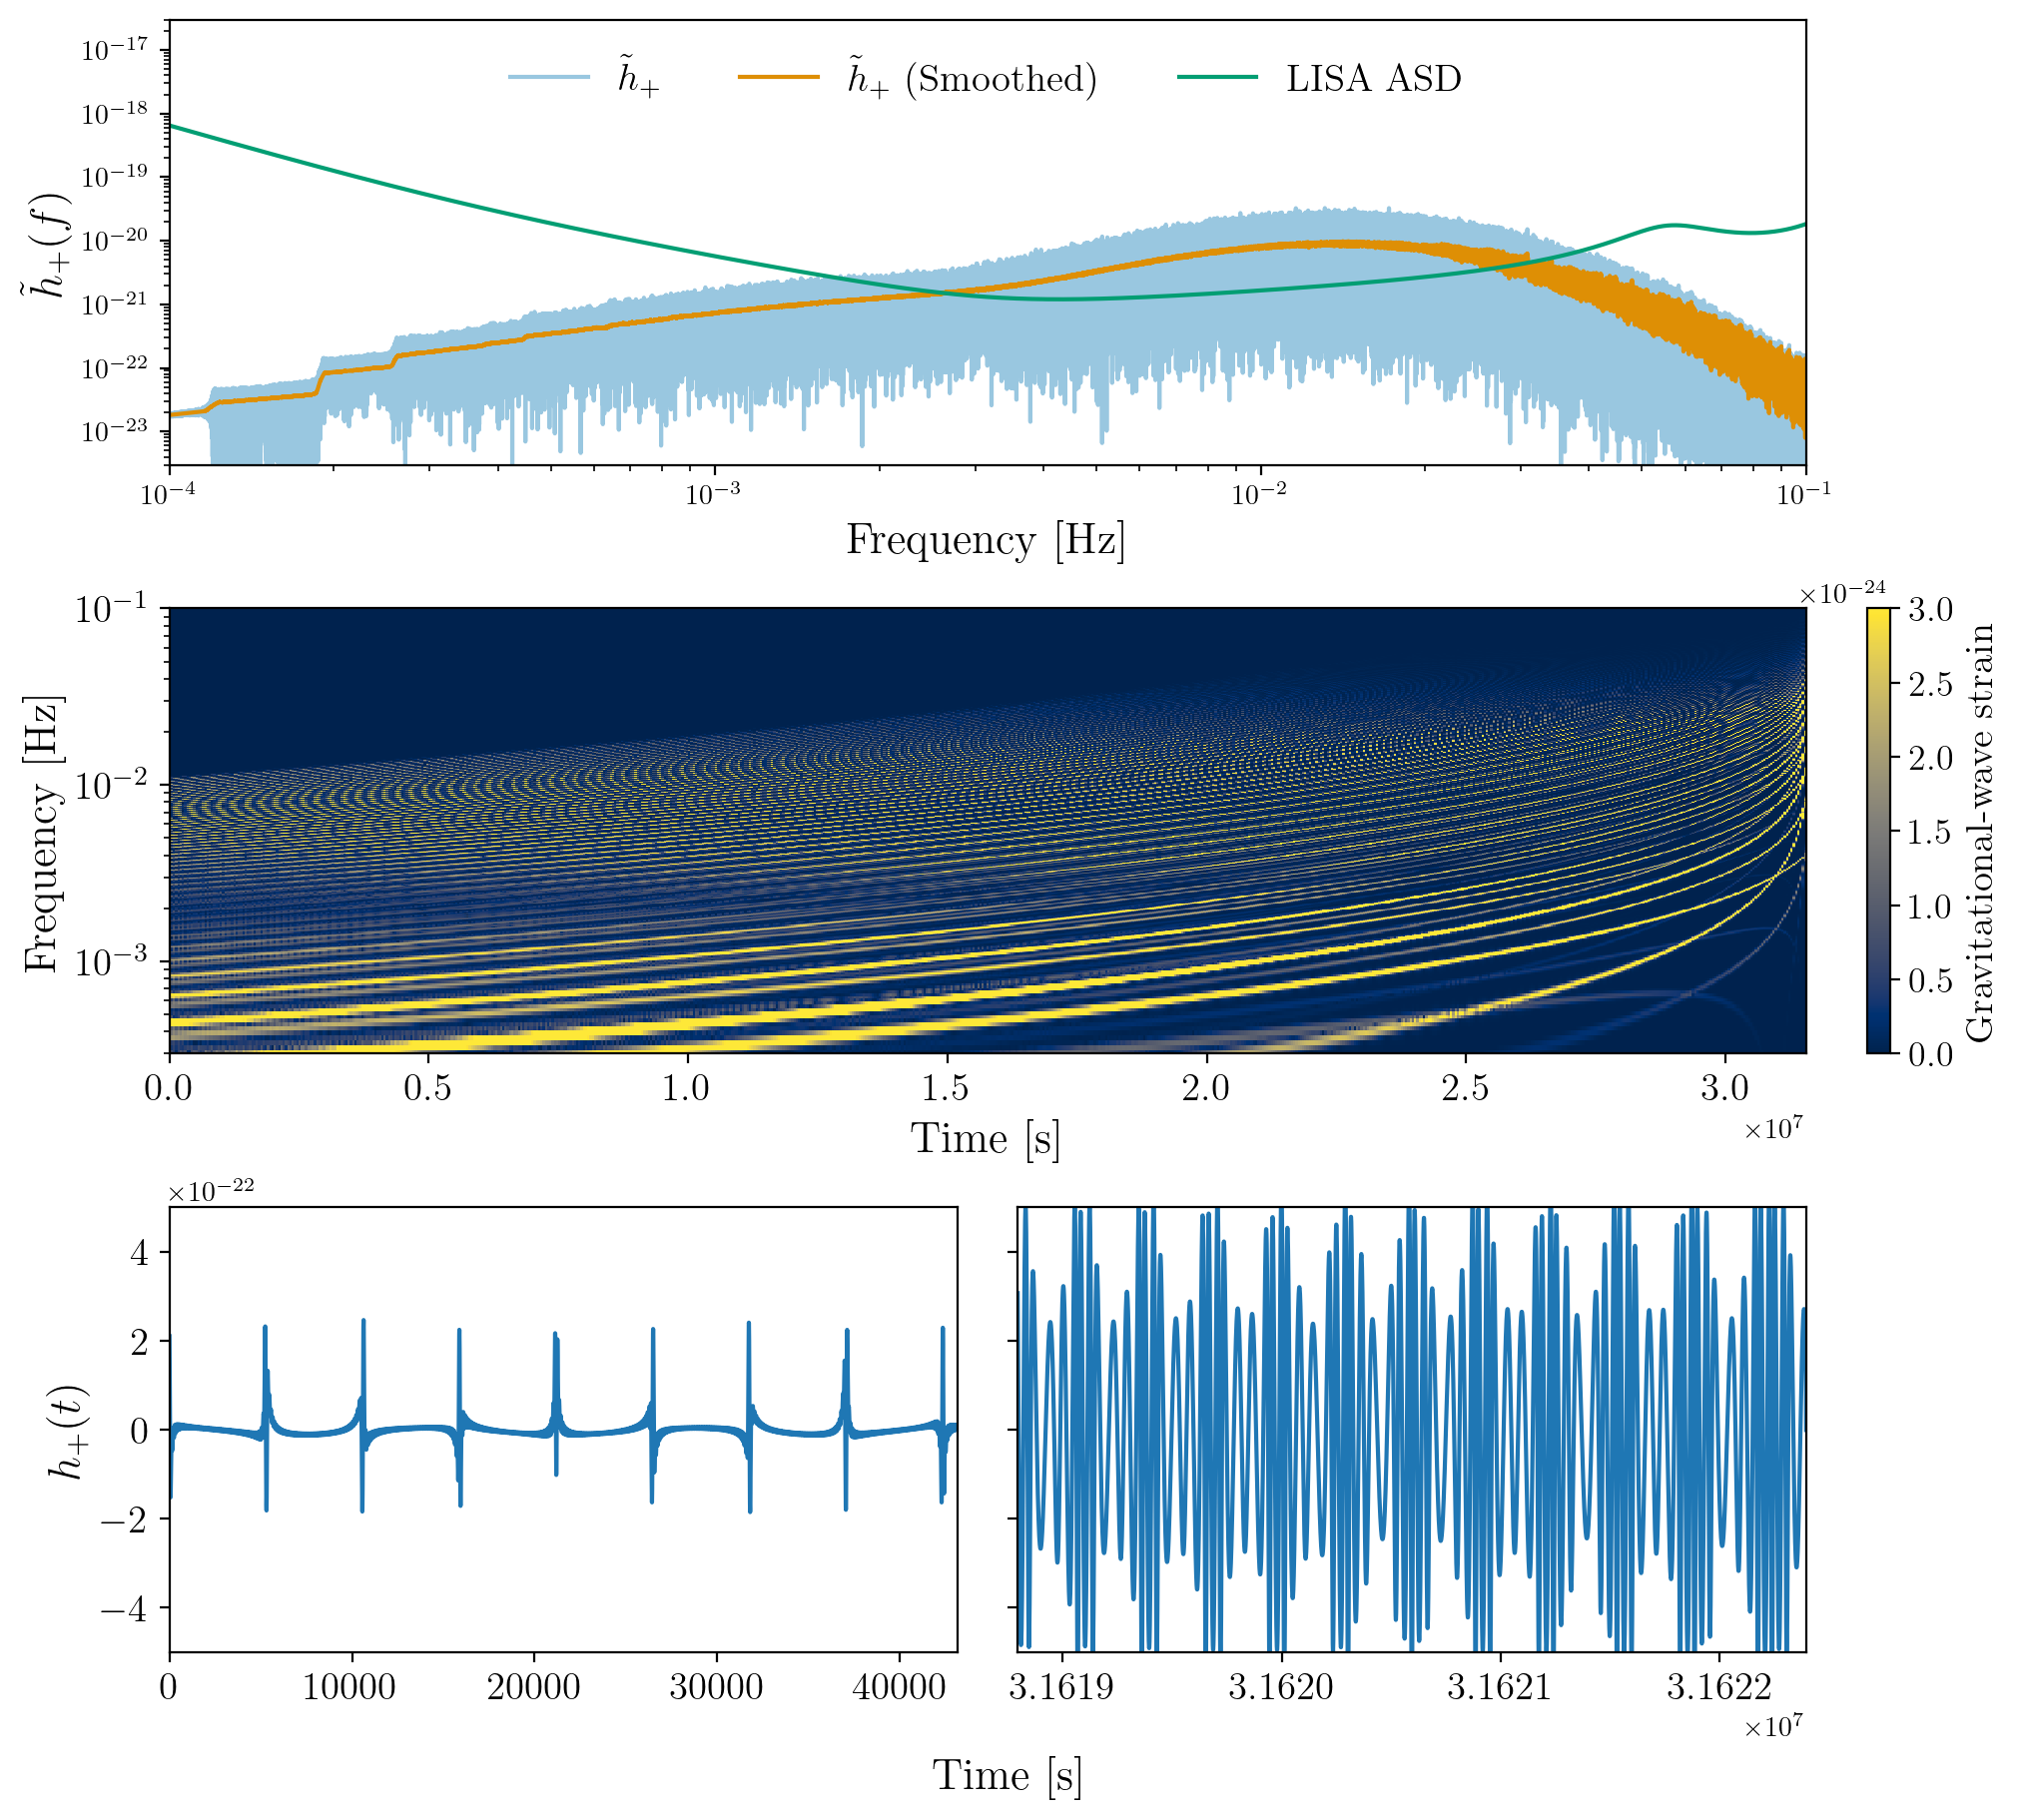

In [17]:
wave_tf = 2 * np.fft.rfft(dt * tukey(samples_per_seg, alpha=1.)[None,:] * wave_plot.real.reshape(nseg, samples_per_seg), axis=1) / tseg
t_seg = np.arange(nseg) * tseg
f_seg = np.fft.rfftfreq(samples_per_seg, d=dt)

vmax = 3e-24
# vmax = 1.5e-23

plt.rcParams['figure.constrained_layout.use'] = True
fig =plt.figure(figsize=(10, 9), dpi=200)
plt.subplot(3, 4, (1,4))

fr = np.fft.rfftfreq(len(wave_plot), d=dt)
wave_fr = np.fft.rfft(wave_plot.real) #* dt

asdh = CubicSpline(*np.loadtxt('LPA.txt', skiprows=1).T)(fr)

t1 = np.fft.rfft(wave_plot.real)
t2 = np.fft.rfft(wave_plot.imag)
print((4*(fr[1]-fr[0])*((t1.conj()*t1 + t2.conj()*t2)/asdh**2).sum()).real**0.5)
to_plot = 2 * fr * np.abs(wave_fr)

#smooth the data with np convolve
to_plot_smooth = np.convolve(to_plot, np.ones(200)/200, mode='same')

# plt.loglog(fr, 4 * fr * np.abs(wave_fr), c=cpal[0], label=r'$\tilde{h}_+$')
plt.loglog(fr, to_plot, c=cpal[0], alpha=0.4, label=r'$\tilde{h}_+$')
plt.loglog(fr, to_plot_smooth, c=cpal[1], label=r'$\tilde{h}_+$ (Smoothed)')
plt.loglog(fr, fr**0.5 * asdh, c=cpal[2], label='LISA ASD')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel(r'$\tilde{h}_+ (f)$', fontsize=16)
plt.xlim(1e-4, 1e-1)
plt.legend(frameon=False, ncols=3, loc='upper center', fontsize=14)

plt.ylim(3e-24, 3e-17)

plt.subplot(3, 4, (5,8))
im = plt.pcolormesh(t_seg, f_seg, np.abs(wave_tf).T, shading='auto', cmap=cmap, vmax=vmax, rasterized=True)
plt.yscale('log')
plt.ylim(3e-4, 1e-1)
plt.xlim(0,YRSID_SI)
# plt.text(0.015, 0.96, '(a)', color='white', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# bring in the colorbar a bit
# cb = plt.colorbar(im, pad=0.02)
# cb.ax.tick_params(labelsize=13)
# cb.set_label(label='Strain (source-frame)', size=14)

plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Frequency [Hz]', fontsize=16)
# turn off the xtick labels but not the ticks themselves
plt.tick_params(axis='both', which='major', labelsize=14)

# cbar_ax = fig.add_axes([1.01, 0.45, 0.02, 0.2])
# cbar_ax.axis('off')
# cb = fig.colorbar(im, ax=cbar_ax)
cb = plt.colorbar(im, pad=-0.02)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Gravitational-wave strain', size=14)

plt.subplot(3, 4, (9,10))
plt.plot(t_all, wave_plot.real)
plt.xlim(0, 43200)
# plt.ylim(-1.5e-21, 1.5e-21)
plt.ylim(-5e-22, 5e-22)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel(r'$h_+ (t)$', fontsize=16)

plt.subplot(3, 4, (11,12))


t_ups = np.arange(len(wave_end_ups)) * dt_ups + t_all[-1] - 3600

plt.plot(t_ups, wave_end_ups.real)
plt.tick_params(axis='y', which='both', labelleft=False)
plt.xlim(t_all[-1] - 3600, t_all[-1])
# plt.ylim(-1.5e-21, 1.5e-21)
plt.ylim(-5e-22, 5e-22)

plt.tick_params(axis='both', which='major', labelsize=14)

fig.supxlabel('Time [s]', fontsize=16)
plt.savefig('temp1.pdf',bbox_inches='tight')
# plt.tight_layout()

In [ ]:


wave_tf = 2 * np.fft.rfft(dt * tukey(samples_per_seg, alpha=1.)[None,:] * wave_plot.real.reshape(nseg, samples_per_seg), axis=1) / tseg
t_seg = np.arange(nseg) * tseg
f_seg = np.fft.rfftfreq(samples_per_seg, d=dt)

vmax = 3e-24
# vmax = 1.5e-23

plt.rcParams['figure.constrained_layout.use'] = True
fig =plt.figure(figsize=(10, 7), dpi=200)
plt.subplot(2, 2, 1)

fr = np.fft.rfftfreq(len(wave_plot), d=dt)
wave_fr = np.fft.rfft(wave_plot.real) * dt

asdh = CubicSpline(*np.loadtxt('LPA.txt', skiprows=1).T)(fr)

t1 = np.fft.rfft(wave_plot.real)*dt
t2 = np.fft.rfft(wave_plot.imag)*dt
print((4*(fr[1]-fr[0])*((t1.conj()*t1 + t2.conj()*t2)/asdh**2).sum()).real**0.5)

to_plot = 2 * fr * np.abs(wave_fr)

#smooth the data with np convolve
to_plot_smooth = np.convolve(to_plot, np.ones(200)/200, mode='same')

# plt.loglog(fr, 4 * fr * np.abs(wave_fr), c=cpal[0], label=r'$\tilde{h}_+$')
plt.loglog(fr, to_plot, c=cpal[0], alpha=0.4, label=r'$\tilde{h}_+$')
plt.loglog(fr, to_plot_smooth, c=cpal[1], label=r'$\tilde{h}_+$ (Smoothed)')
plt.loglog(fr, fr**0.5 * asdh, c=cpal[2], label='LISA ASD')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Characteristic strain', fontsize=16)
plt.xlim(1e-4, 1e-1)
plt.ylim(3e-24, 3e-16)
plt.legend(loc='upper right', frameon=False, fontsize=14)

plt.subplot(2, 2, 2)
im = plt.pcolormesh(t_seg, f_seg, np.abs(wave_tf).T, shading='auto', cmap=cmap, vmax=vmax, rasterized=True)
plt.yscale('log')
plt.ylim(3e-4, 1e-1)
plt.xlim(0,YRSID_SI)
# plt.text(0.015, 0.96, '(a)', color='white', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# bring in the colorbar a bit
# cb = plt.colorbar(im, pad=0.02)
# cb.ax.tick_params(labelsize=13)
# cb.set_label(label='Strain (source-frame)', size=14)

plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Frequency [Hz]', fontsize=16)
# turn off the xtick labels but not the ticks themselves
plt.tick_params(axis='both', which='major', labelsize=14)

# cbar_ax = fig.add_axes([1.01, 0.45, 0.02, 0.2])
# cbar_ax.axis('off')
# cb = fig.colorbar(im, ax=cbar_ax)
cb = plt.colorbar(im, pad=-0.02)
cb.ax.tick_params(labelsize=13)
cb.set_label(label='Gravitational-wave strain', size=14)

plt.subplot(2, 2, 3)
plt.plot(t_all, wave_plot.real, c=cpal[0])
plt.xlim(0, 43200)
# plt.ylim(-1.5e-21, 1.5e-21)
plt.ylim(-7e-22, 7e-22)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel(r'$h_+ (t)$', fontsize=16)
plt.xlabel('Time [s]', fontsize=16)

plt.subplot(2,2,4)
t_ups = np.arange(len(wave_end_ups)) * dt_ups + t_all[-1] - 3600

plt.plot(t_ups, wave_end_ups.real,c=cpal[0])
plt.tick_params(axis='y', which='both', labelleft=False)
plt.xlim(t_all[-1] - 1800, t_all[-1])
# plt.ylim(-1.5e-21, 1.5e-21)
plt.ylim(-7e-22, 7e-22)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time [s]', fontsize=16)
plt.savefig('temp2.pdf',bbox_inches='tight')
# plt.tight_layout()

37.59914498709784
